In [9]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from IPython.display import display, Latex, HTML, Math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import math as math
from matplotlib import pyplot as plt
from sympy.abc import t
from IPython.display import display, Math, Latex
import numpy as np
%matplotlib inline
x, y, z, t, u, c = symbols('x y z t u c')
sp.init_printing() 

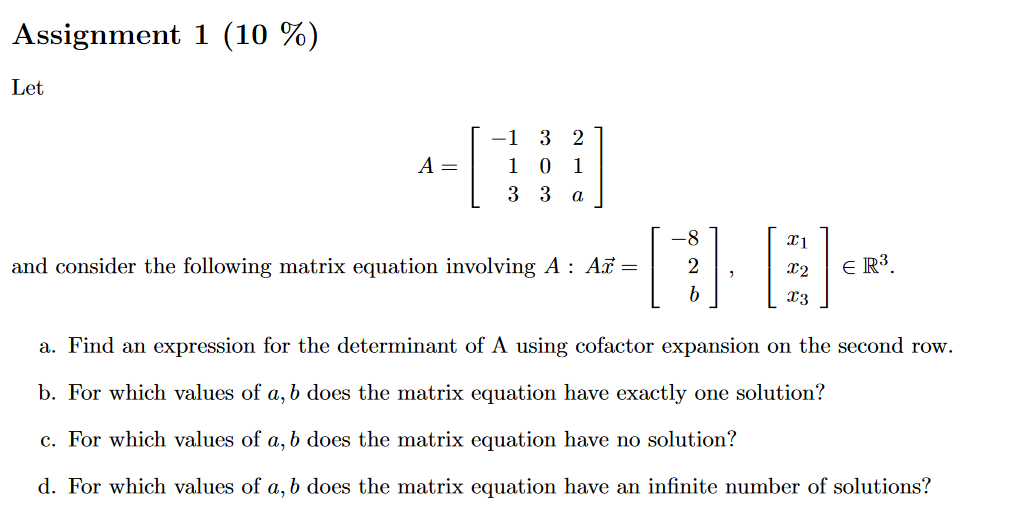

In [13]:
a, b = symbols('a b')
A = Matrix([[-1, 3, 2], [1, 0, 1], [3, 3, a]])

# a. Determinant
M21 = Matrix([[3, 2], [3, a]]).det()
C21 = -M21

# C22 = (-1)^(2+2) * M22 = M22  
M22 = Matrix([[-1, 2], [3, a]]).det()
C22 = M22

# C23 = (-1)^(2+3) * M23 = -M23
M23 = Matrix([[-1, 3], [3, 3]]).det()
C23 = -M23

det_A = 1*C21 + 0*C22 + 1*C23
det_A = C21 + C23


print(f"det(A) = 1*({C21}) + 0*({C22}) - 1*({C23}) = {det_A}")

# b. Exactly one solution
det_zeros = solve(det_A, a)

# c. No solution condition
A_sub = A.subs(a, det_zeros[0])
b_vec = Matrix([-8, 2, b])
augmented = A_sub.row_join(b_vec)
rref_aug = augmented.rref()[0]

# Check the last row for inconsistency condition
print("RREF of augmented matrix:")
sp.pprint(rref_aug)

# Extract condition from last row manually
last_row_rhs = rref_aug[-1, -1]
print(f"Last row RHS: {last_row_rhs}")

# For no solution: last row should be [0 0 0 | non-zero]
# For infinite solutions: last row should be [0 0 0 | 0]

print(f"a. det(A) = {det_A}")
print(f"b. Exactly one solution: a ≠ {det_zeros[0]}")
print(f"c. No solution: a = {det_zeros[0]} and b ≠ {-last_row_rhs}")
print(f"d. Infinite solutions: a = {det_zeros[0]} and b = {-last_row_rhs}")

det(A) = 1*(6 - 3*a) + 0*(-a - 6) - 1*(12) = 18 - 3*a
RREF of augmented matrix:
⎡1  0  1  0⎤
⎢          ⎥
⎢0  1  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦
Last row RHS: 1
a. det(A) = 18 - 3*a
b. Exactly one solution: a ≠ 6
c. No solution: a = 6 and b ≠ -1
d. Infinite solutions: a = 6 and b = -1


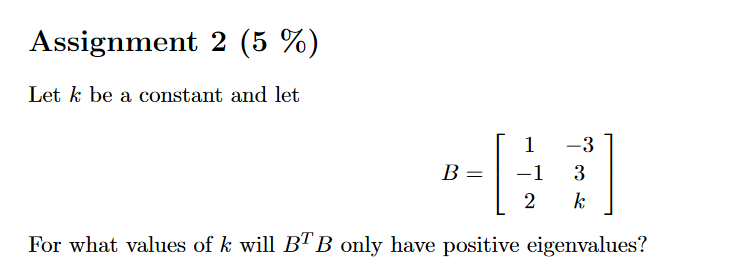

In [16]:
k = symbols('k')
B = Matrix([[1, -3], [-1, 3], [2, k]])

BT = B.T
BTB = BT * B

# find eighenvalues by solving det(BTB - lambda * I) = 0
lambda_ = symbols('lambda')
I = sp.eye(2)
char_matrix = BTB - lambda_ * I
char_eq = char_matrix.det()
eigenvalues = solve(char_eq, lambda_)
print(eigenvalues)

# for only positiv eigenvalues
k_values = []
for k_val in eigenvalues:
    solve(k_val > 0, k)
    k_values.append(k_val)
print(k_values)



[k**2/2 - sqrt(k**4 + 40*k**2 - 96*k + 288)/2 + 12, k**2/2 + sqrt(k**4 + 40*k**2 - 96*k + 288)/2 + 12]
[k**2/2 - sqrt(k**4 + 40*k**2 - 96*k + 288)/2 + 12, k**2/2 + sqrt(k**4 + 40*k**2 - 96*k + 288)/2 + 12]


In [ ]:


k = symbols('k')
B = Matrix([[1, -3], [-1, 3], [2, k]])

# Calculate B^T * B
BTB = B.T * B
# Calculate det and trace manually
det_val = BTB.det()
trace_val = BTB.trace()

print(f"det(B^T*B) = {det_val}")
print(f"trace(B^T*B) = {trace_val}")

# Solve inequalities manually
print(f"\nFor det > 0: {det_val} > 0")
print(f"For trace > 0: {trace_val} > 0")

# Since det = k^2 + 6 and trace = 6 + k^2
# det > 0: k^2 + 6 > 0 (always true since k^2 ≥ 0)
# trace > 0: 6 + k^2 > 0 (always true since k^2 ≥ 0)

print(f"\nAnswer: All real values of k")

# For trace > 0: k² + 24 > 0

# Since k² ≥ 0 for all real k, we have k² + 24 ≥ 24 > 0
# This is always true for all real k
# For det > 0: 2k² + 24k + 72 > 0

# Factor out 2: 2(k² + 12k + 36) > 0
# Factor the quadratic: 2(k + 6)² > 0
# Since (k + 6)² ≥ 0 for all real k, and equals 0 only when k = -6
# We need 2(k + 6)² > 0, which means (k + 6)² > 0
# This is true for all k ≠ -6
# Correction to your answer: The answer should be: k ∈ ℝ, k ≠ -6

# When k = -6, det = 0, which means one eigenvalue is zero (not positive).

# So the final answer is: All real values of k except k = -6.

det(B^T*B) = 2*k**2 + 24*k + 72
trace(B^T*B) = k**2 + 24

For det > 0: 2*k**2 + 24*k + 72 > 0
For trace > 0: k**2 + 24 > 0

Answer: All real values of k


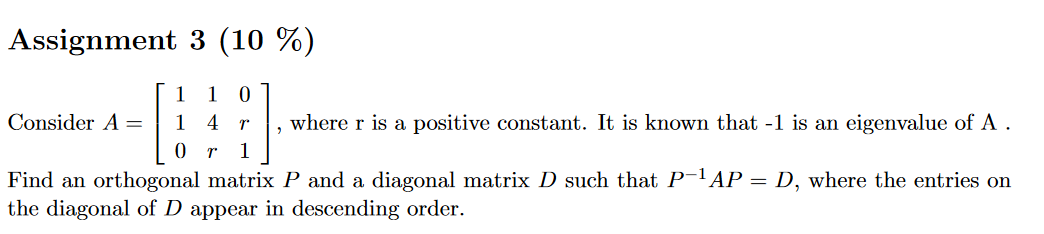

In [22]:
r = symbols('r', positive=True)
A = Matrix([[1,1,0],[1,4,r],[0,r,1]])

# Find eigenvalues (we know -1 is one of them)
eigenvals = solve(A.charpoly().as_expr(), A.charpoly().gen)

# Find value of r using the known eigenvalue -1
r_value = solve(A.charpoly().subs(A.charpoly().gen, -1), r)[0]

# Substitute r value
A_sub = A.subs(r, r_value)

# Find all eigenvalues with r substituted
eigenvals_final = solve(A_sub.charpoly().as_expr(), A_sub.charpoly().gen)
eigenvals_sorted = sorted(eigenvals_final, reverse=True)

# Find eigenvectors for each eigenvalue
P_cols = []
for eigval in eigenvals_sorted:
    eigenvector = (A_sub - eigval * sp.eye(3)).nullspace()[0]
    P_cols.append(eigenvector)

P = Matrix.hstack(*P_cols)
D = sp.diag(*eigenvals_sorted)

print(f"r = {r_value}")
print("P =")
sp.pprint(P)
print("D =")
sp.pprint(D)


r = 3
P =
⎡1/3  -3  1/3 ⎤
⎢             ⎥
⎢5/3  0   -2/3⎥
⎢             ⎥
⎣ 1   1    1  ⎦
D =
⎡6  0  0 ⎤
⎢        ⎥
⎢0  1  0 ⎥
⎢        ⎥
⎣0  0  -1⎦


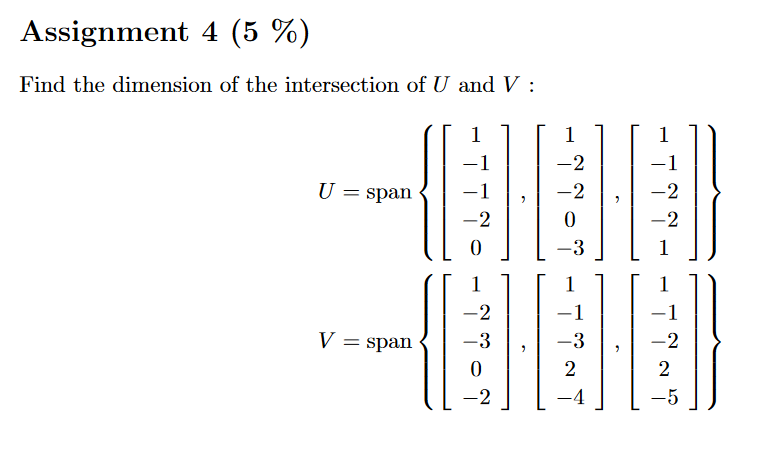

In [24]:
U = Matrix([
    [1, 1, 1],
    [-1, -2, -1], 
    [-1, -2, -2],
    [-2, 0, -2],
    [0, -3, 1]
])

V = Matrix([
    [1, 1, 1],
    [-2, -1, -1],
    [-3, -3, -2], 
    [0, 2, 2],
    [-2, -4, -5]
])

# Calculate dimensions
dim_U = U.rank()
dim_V = V.rank()
dim_UV = Matrix.hstack(U, V).rank()

dim_intersection = dim_U + dim_V - dim_UV

print(f"dim(U ∩ V) = {dim_intersection}")

dim(U ∩ V) = 2


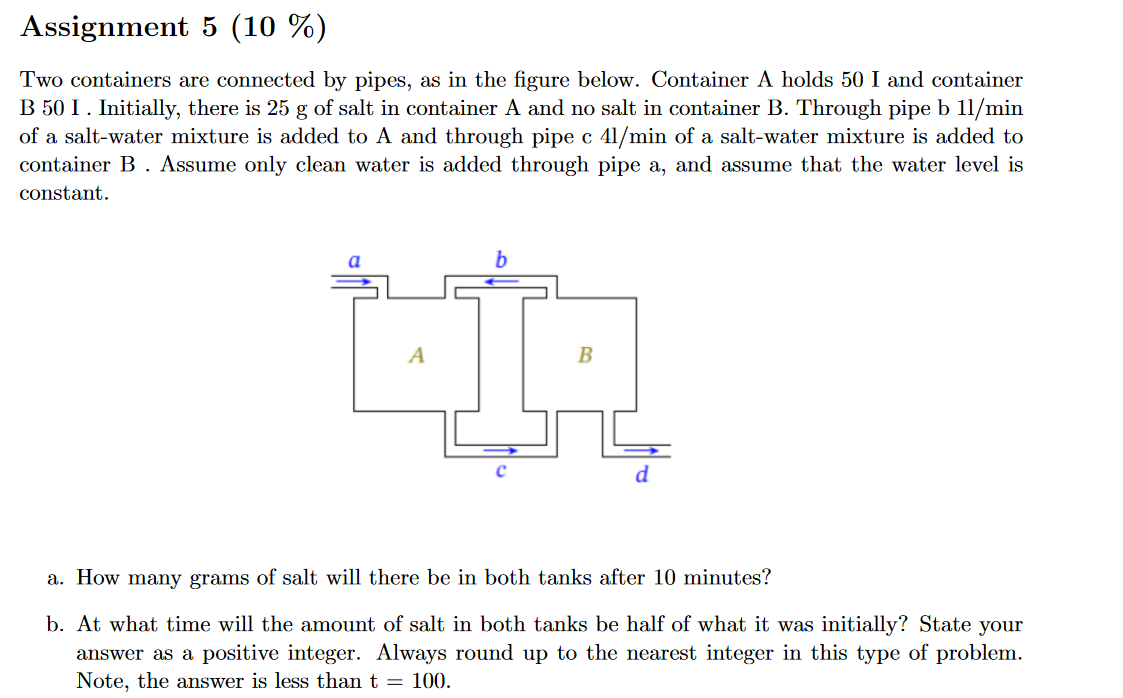

In [38]:
t = symbols('t', positive=True)
y1, y2 = symbols('y1 y2', cls=Function)
# Let's try: 3L/min exits through pipe d
eq1 = Eq(y1(t).diff(t), -(4/50)*y1(t) + (1/50)*y2(t))
eq2 = Eq(y2(t).diff(t), (4/50)*y1(t) - (1/50)*y2(t) - (3/50)*y2(t))

# Solve
solutions = dsolve([eq1, eq2], [y1(t), y2(t)], ics={y1(0): 25, y2(0): 0})
y1_sol = solutions[0].rhs
y2_sol = solutions[1].rhs

total_10 = float(y1_sol.subs(t, 10) + y2_sol.subs(t, 10))
time_half = solve(y1_sol + y2_sol - 12.5, t)
valid_times = [float(sol) for sol in time_half if sol.is_real and sol > 0]

print(f"a. {total_10:.2f} g")
print(f"b. {round(min(valid_times))} minutes" if valid_times else "No solution")

a. 21.37 g
No solution


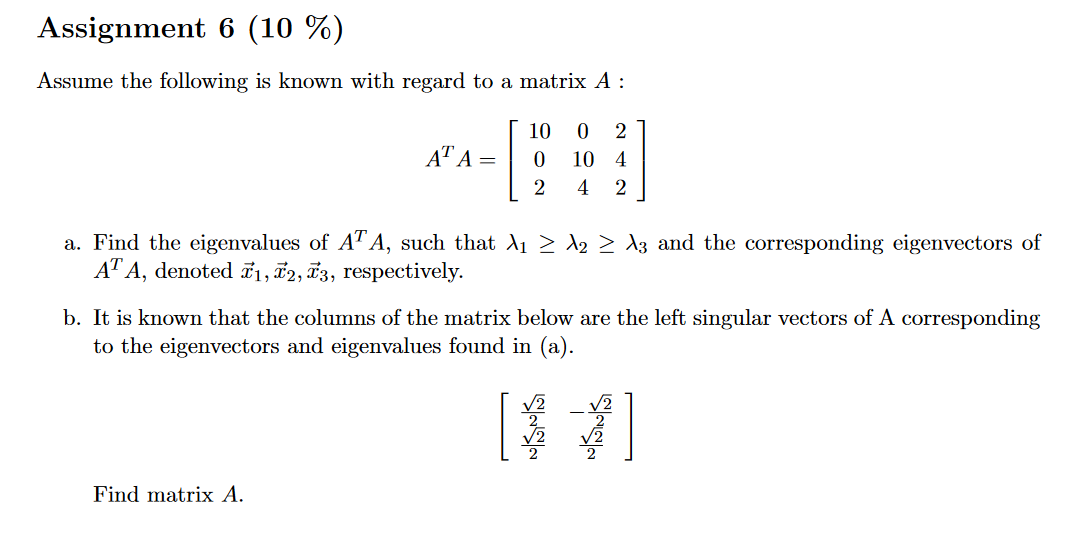

In [39]:
ATA = Matrix([[10, 0, 2], [0, 10, 4], [2, 4, 2]])

# a. Find eigenvalues and eigenvectors of A^T A
eigenvals = solve(ATA.charpoly().as_expr(), ATA.charpoly().gen)
eigenvals_sorted = sorted(eigenvals, reverse=True)

eigenvectors = []
for eigval in eigenvals_sorted:
    eigvec = (ATA - eigval * sp.eye(3)).nullspace()[0]
    eigenvectors.append(eigvec)

print("a. Eigenvalues (λ1 ≥ λ2 ≥ λ3):")
for i, eigval in enumerate(eigenvals_sorted):
    print(f"λ{i+1} = {eigval}")

print("\nEigenvectors:")
for i, eigvec in enumerate(eigenvectors):
    print(f"x{i+1} ="), sp.pprint(eigvec)

# b. Given left singular vectors U (2x2 matrix)
U = Matrix([[sqrt(2)/2, -sqrt(2)/2], [sqrt(2)/2, sqrt(2)/2]])

# From SVD: A = U Σ V^T
# Where Σ has singular values σi = √λi on diagonal
# V has eigenvectors of A^T A as columns

sigma_values = [sqrt(eigval) for eigval in eigenvals_sorted if eigval > 0]
V = Matrix.hstack(*eigenvectors)

# Create Σ matrix (2x3 since A is 2x3)
Sigma = sp.zeros(2, 3)
for i, sigma in enumerate(sigma_values):
    Sigma[i, i] = sigma

# Calculate A = U Σ V^T
A = U * Sigma * V.T

print(f"\nb. Matrix A:")
sp.pprint(A)

a. Eigenvalues (λ1 ≥ λ2 ≥ λ3):
λ1 = 12
λ2 = 10
λ3 = 0

Eigenvectors:
x1 =
⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣1⎦
x2 =
⎡-2⎤
⎢  ⎥
⎢1 ⎥
⎢  ⎥
⎣0 ⎦
x3 =
⎡-1/5⎤
⎢    ⎥
⎢-2/5⎥
⎢    ⎥
⎣ 1  ⎦

b. Matrix A:
⎡√6 + 2⋅√5   -√5 + 2⋅√6  √6⎤
⎢                          ⎥
⎣-2⋅√5 + √6  √5 + 2⋅√6   √6⎦
